In [15]:
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.datasets import make_moons
import numpy as np

In [16]:
X, y = make_moons(100, noise=0.25,random_state=2)

In [17]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.get_weights()

[array([[ 0.46417087, -0.620098  , -0.6539095 , -0.46052223,  0.65377563,
         -0.12430149,  0.37657756,  0.19919294, -0.42768312,  0.24124163],
        [ 0.19647342,  0.38689   , -0.3846249 ,  0.3042652 , -0.4536916 ,
          0.06688672,  0.684761  , -0.493738  ,  0.40753525, -0.40872008]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.5211858 ],
        [ 0.5436111 ],
        [ 0.7033271 ],
        [-0.10778654],
        [-0.4263295 ],
        [ 0.43702036],
        [-0.46112207],
        [-0.4856509 ],
        [ 0.27290064],
        [ 0.02799839]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
# Set parameters to 0
initial_weights = model.get_weights()

In [20]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [21]:
model.set_weights(initial_weights)

In [22]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5125 - loss: 0.6935 - val_accuracy: 0.6500 - val_loss: 0.6927
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5508 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6937
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5578 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6951
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5734 - loss: 0.6923 - val_accuracy: 0.3500 - val_loss: 0.6963
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4797 - loss: 0.6936 - val_accuracy: 0.3500 - val_loss: 0.6970
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5070 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6979
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5031 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6990
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5188 - loss: 0.6925 - val_accuracy: 0.3500 - val_loss: 

In [37]:
model.get_weights()

[array([[ 0.37101182,  0.37101182,  0.37101182,  0.37101182,  0.37101182,
          0.37101182,  0.37101182,  0.37101182,  0.37101182,  0.37101182],
        [-0.40650332, -0.40650332, -0.40650332, -0.40650332, -0.40650332,
         -0.40650332, -0.40650332, -0.40650332, -0.40650332, -0.40650332]],
       dtype=float32),
 array([-0.06866731, -0.06866731, -0.06866731, -0.06866731, -0.06866731,
        -0.06866731, -0.06866731, -0.06866731, -0.06866731, -0.06866731],
       dtype=float32),
 array([[0.07013524],
        [0.07013524],
        [0.07013524],
        [0.07013524],
        [0.07013524],
        [0.07013524],
        [0.07013524],
        [0.07013524],
        [0.07013524],
        [0.07013524]], dtype=float32),
 array([-0.02854297], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 882us/step


<Axes: >

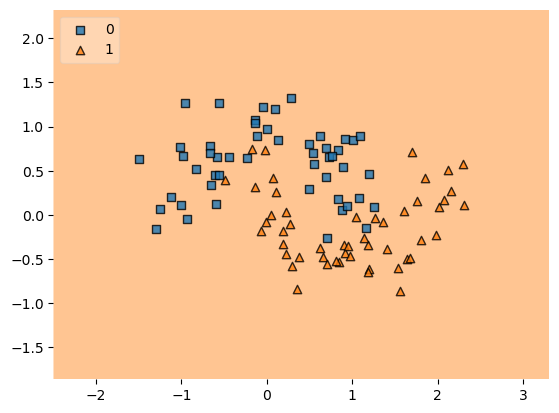

In [26]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [27]:
model1 = Sequential()

model1.add(Dense(2,activation='sigmoid',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model1.get_weights()

[array([[ 0.775059  ,  1.1010121 ],
        [ 0.4794917 , -0.31457955]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.9192696e-05],
        [9.7865713e-01]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
initial_weights = model1.get_weights()

In [30]:
initial_weights[0] = np.ones(model1.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model1.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model1.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model1.get_weights()[3].shape)*0.5

In [31]:
model1.set_weights(initial_weights)

In [32]:
model1.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [33]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history1 = model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5305 - loss: 0.8245 - val_accuracy: 0.3500 - val_loss: 1.0154
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5188 - loss: 0.8368 - val_accuracy: 0.3500 - val_loss: 1.0122
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5500 - loss: 0.7945 - val_accuracy: 0.3500 - val_loss: 1.0090
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5422 - loss: 0.8053 - val_accuracy: 0.3500 - val_loss: 1.0058
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5578 - loss: 0.7840 - val_accuracy: 0.3500 - val_loss: 1.0026
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5344 - loss: 0.8123 - val_accuracy: 0.3500 - val_loss: 0.9994
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5734 - loss: 0.7658 - val_accuracy: 0.3500 - val_loss: 0.9963
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5305 - loss: 0.8129 - val_accuracy: 0.3500 - val_loss:

In [35]:
model1.get_weights

<bound method Layer.get_weights of <Sequential name=sequential_3, built=True>>

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 786us/step


<Axes: >

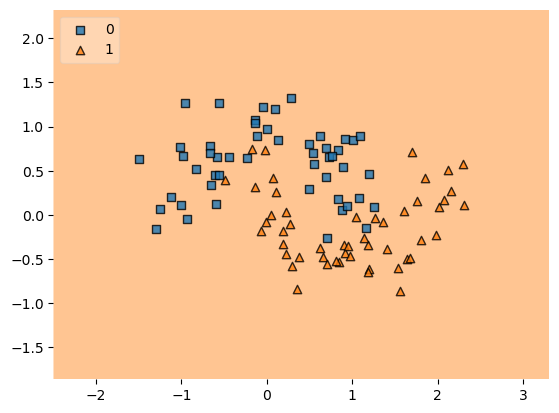

In [36]:
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)